we used canny in introduction 

- canny is good at detecting all possible lines
    - but gave us alot of edges, we ended up discarding 
- in lane detection, we know the lanes are closer to be vertical 
- with canny we used derivatives with resprect to x and y to find edges 
    - let's see the indiviual derivatives 

## Sobel operator 

The Sobel operator is at the heart of the Canny edge detection algorithm you used in the Introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the xx or yy direction. The operators for Sobel_x
  and Sobel_y
 , respectively, look like this:

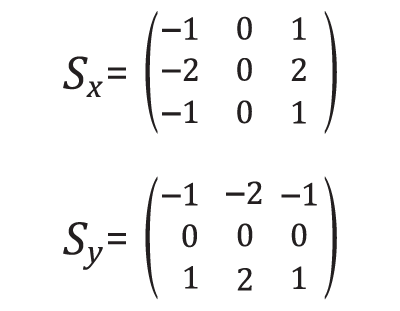

- You need to pass a single color channel to the cv2.Sobel() function, so first convert it to grayscale:


In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread('curved-lane.jpg')
grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(grey,cmap='gray')

Calculate the derivative in the xx direction (the 1, 0 at the end denotes xx direction):

In [ ]:
sobelx = cv2.Sobel(grey,cv2.CV_64F,1,0)
sobely = cv2.Sobel(grey,cv2.CV_64F,0,1)

# the range of output will be from -4*255 to 4*255

In [ ]:
abs_sobelx = np.absolute(sobelx) # the sign only means from white to black or black to white
# now the range is from 0 to 4*255

In [ ]:
#scale the output, Convert the absolute value image to 8-bit: 
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
plt.imshow(scaled_sobel,cmap='gray')

In [ ]:
scaled_sobel_mine = np.uint8(abs_sobelx/4)

In [ ]:
#mine
thresh_min = 20
thresh_max = 100
sobelx_thresholded = np.zeros_like(scaled_sobel)
mask = (scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)
sobelx_thresholded[mask] = 1
plt.imshow(sobelx_thresholded,cmap='gray')

In [ ]:
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

In [ ]:
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel_mine)
sxbinary[(scaled_sobel_mine >= thresh_min) & (scaled_sobel_mine <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

Quiz

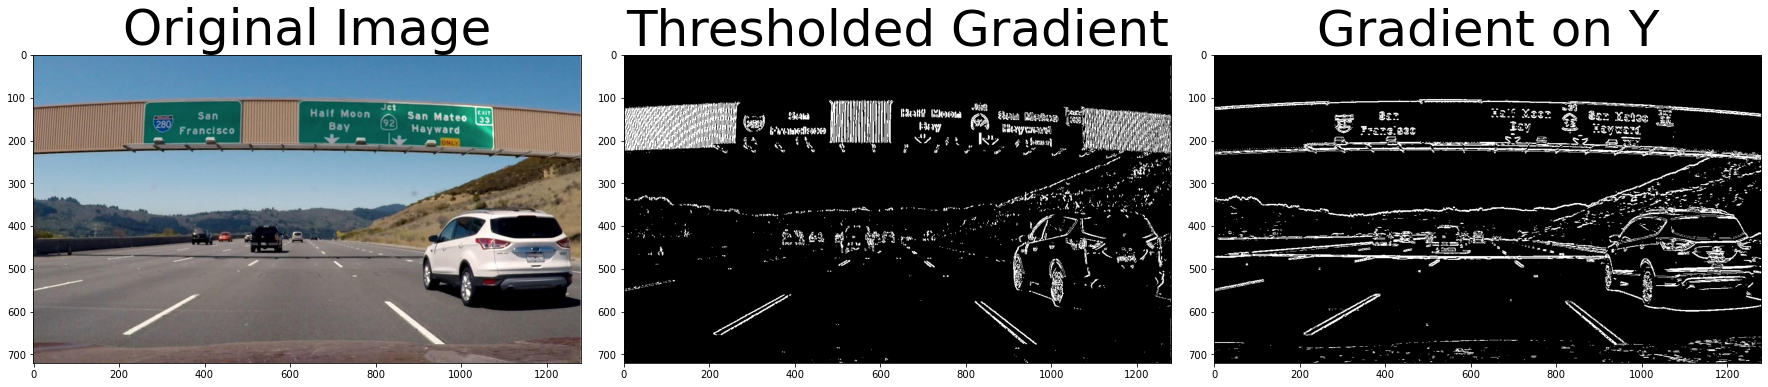

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = plt.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Apply the following steps to img
    # 1) Convert to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        gradient = cv2.Sobel(grey,cv2.CV_64F,1,0)
    elif orient == 'y':
        gradient = cv2.Sobel(grey,cv2.CV_64F,0,1)
    # 3) Take the absolute value of the derivative or gradient
    gradient_abs = abs(gradient)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_gradient_abs = np.uint8(255*gradient_abs/gradient_abs.max()) #if maximum is 4*255 it will be like dividing by 4
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_img = np.zeros_like(scaled_gradient_abs)
    binary_img[(scaled_gradient_abs >= thresh_min) & (scaled_gradient_abs <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_img
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
grad_binary_y = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
ax3.imshow(grad_binary_y,cmap='gray')
ax3.set_title('Gradient on Y',fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

With the result of the last quiz, you can now take the gradient in x or y and set thresholds to identify pixels within a certain gradient range. If you play around with the thresholds a bit, you'll find the x-gradient does a cleaner job of picking up the lane lines, but you can see the lines in the y-gradient as well.

In this next exercise, your goal is to apply a threshold to the overall magnitude of the gradient, in both x and y.

It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter.

## Magnitude of the gradient 

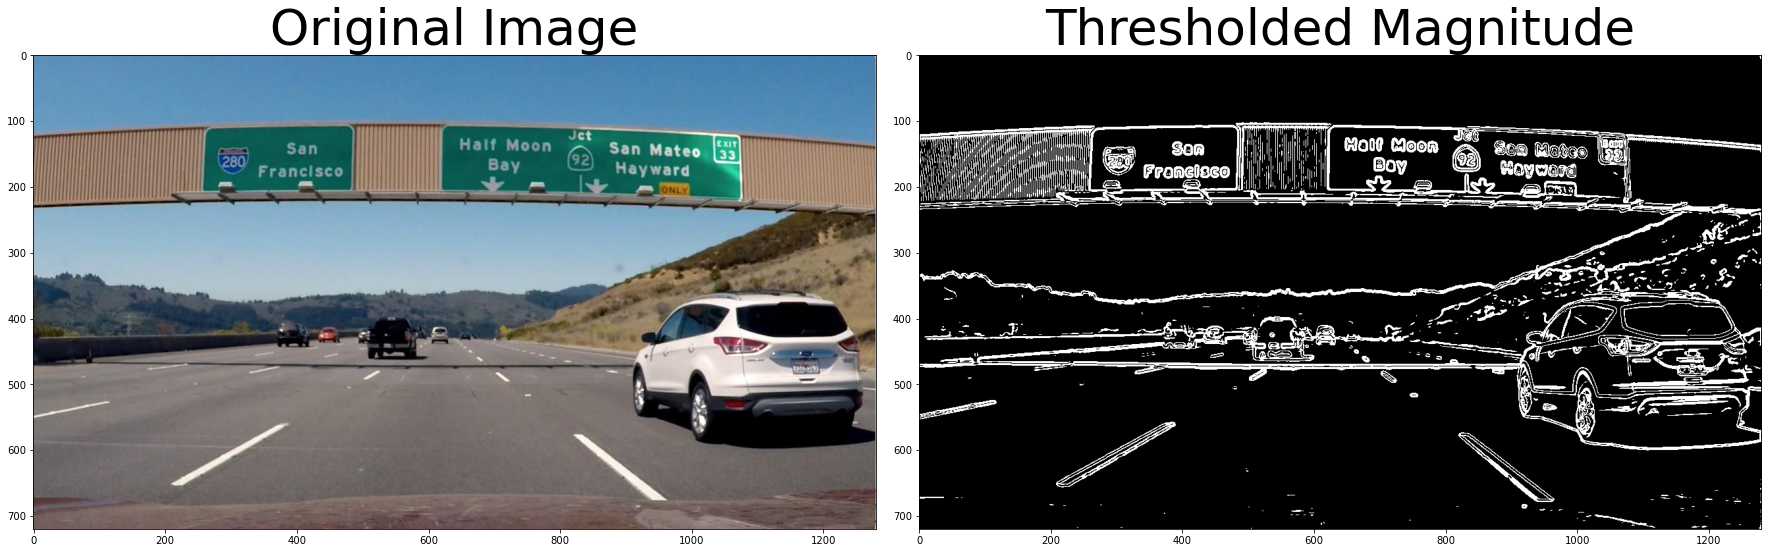

In [3]:
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

When you play around with the thresholding for the gradient magnitude in the previous exercise, you find what you might expect, namely, that it picks up the lane lines well, but with a lot of other stuff detected too. Gradient magnitude is at the heart of Canny edge detection, and is why Canny works well for picking up all edges.

In the case of lane lines, we're interested only in edges of a particular orientation. So now we will explore the direction, or orientation, of the gradient.

## Direction of the gradient 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = abs(sobelx)
    abs_sobely = abs(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    gradient_dir = np.arctan(abs_sobely/abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output =  np.zeros_like(gradient_dir)
    binary_output[(gradient_dir >= thresh[0]) & (gradient_dir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

<ipython-input-2-b8e2b14803c8>:65: RuntimeWarning: divide by zero encountered in true_divide
  gradient_dir = np.arctan(abs_sobely/abs_sobelx)
<ipython-input-2-b8e2b14803c8>:65: RuntimeWarning: invalid value encountered in true_divide
  gradient_dir = np.arctan(abs_sobely/abs_sobelx)


<Figure size 3456x1296 with 0 Axes>

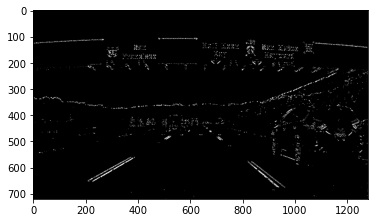

<Figure size 3456x1296 with 0 Axes>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

image = mpimg.imread('signs_vehicles_xygrad.png')

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    # Apply the following steps to img
    # 1) Convert to grayscale
    grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        gradient = cv2.Sobel(grey,cv2.CV_64F,1,0)
    elif orient == 'y':
        gradient = cv2.Sobel(grey,cv2.CV_64F,0,1)
    # 3) Take the absolute value of the derivative or gradient
    gradient_abs = abs(gradient)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_gradient_abs = np.uint8(255*gradient_abs/gradient_abs.max()) #if maximum is 4*255 it will be like dividing by 4
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_img = np.zeros_like(scaled_gradient_abs)
    binary_img[(scaled_gradient_abs >= thresh_min) & (scaled_gradient_abs <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_img

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
     # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = abs(sobelx)
    abs_sobely = abs(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    gradient_dir = np.arctan(abs_sobely/abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output =  np.zeros_like(gradient_dir)
    binary_output[(gradient_dir >= thresh[0]) & (gradient_dir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

thresh_min = 20
thresh_max = 100

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(10, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(10, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
combined = np.zeros_like(dir_binary) 
combined[((gradx == 1) & (grady == 1)) & ((mag_binary == 1) & (dir_binary == 1))] = 1
#combined[(dir_binary == 1) & ((gradx) == 1) & (mag_binary == 1) & (grady) == 1] = 1
plt.imshow(combined,cmap='gray')
plt.figure(figsize=(48,18))

## Color spaces 

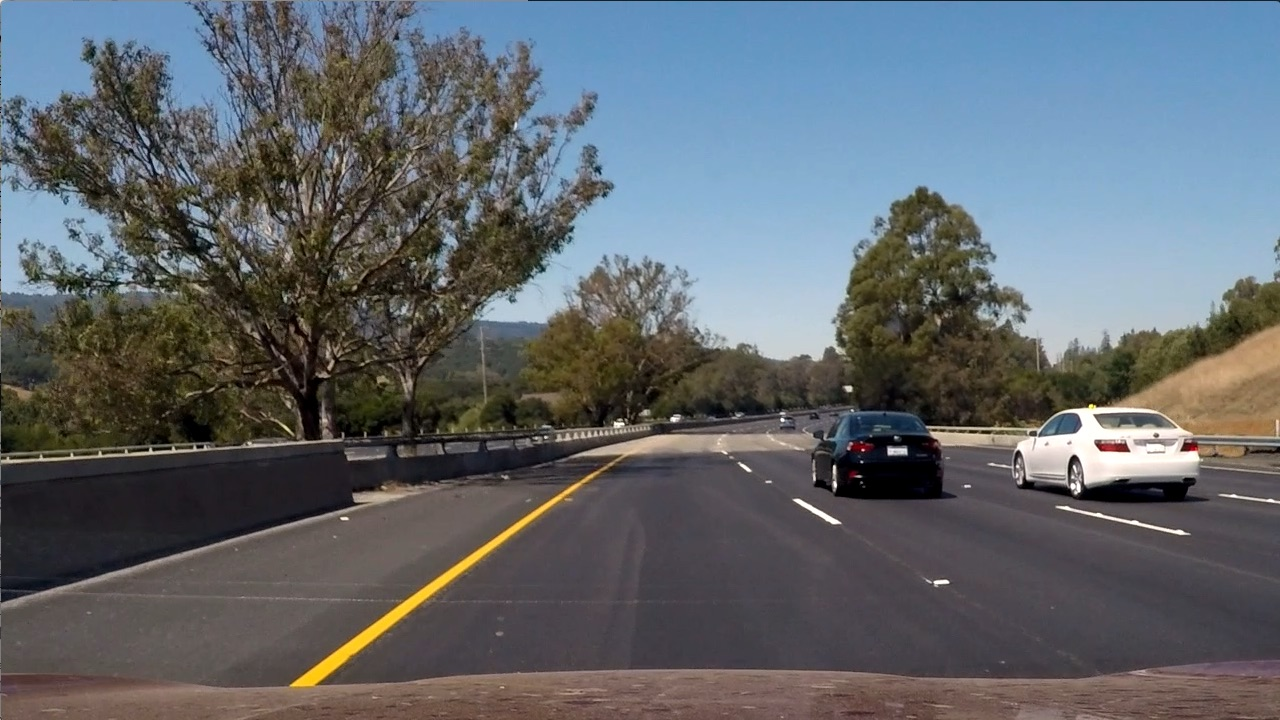

You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.

Here I'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:

<module 'matplotlib.pyplot' from 'C:\\Users\\yousef.DESKTOP-PKSNIQM\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

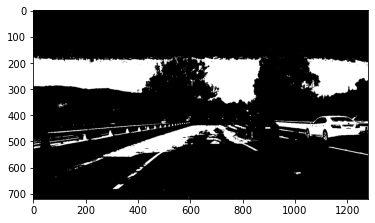

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('test4.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray >= thresh[0]) & (gray <= thresh[1])] = 1
#binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
plt.imshow(binary,cmap='gray')
plt

You might have also explored thresholding individual RGB color channels. You can take a look at them side by side to see which ones do a better job of picking up the lane lines:

Text(0.5, 1.0, 'Blue')

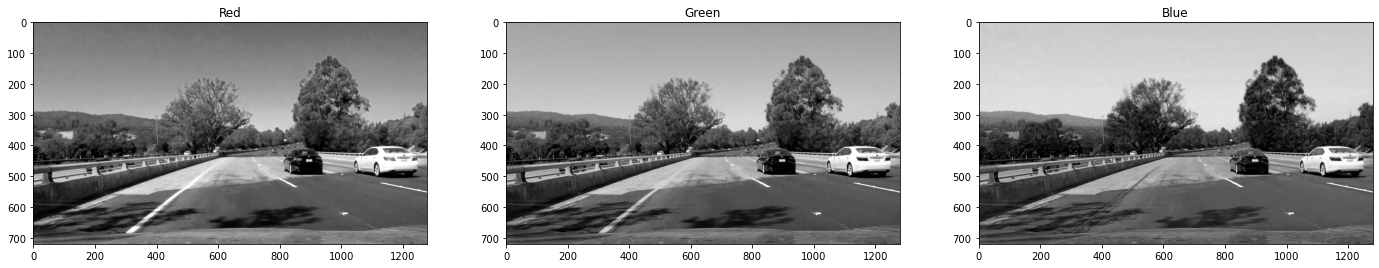

In [49]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,9))
ax1.imshow(R,cmap='gray')
ax1.set_title('Red')
ax2.imshow(G,cmap='gray')
ax2.set_title('Green')
ax3.imshow(B,cmap='gray')
ax3.set_title('Blue')

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:

Text(0.5, 1.0, 'R Binary')

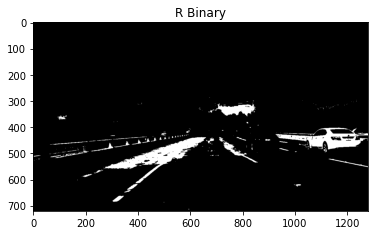

In [50]:
binary = np.zeros_like(R)
thresh = (200,255)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
plt.imshow(binary,cmap='gray')
plt.title('R Binary')

## HLS

In this lesson, we're looking at different color spaces. While there are several that are worth exploring, here we'll look specifically at HLS. When we separate the H, L, and S channels we get the following result:

Text(0.5, 1.0, 'Saturation')

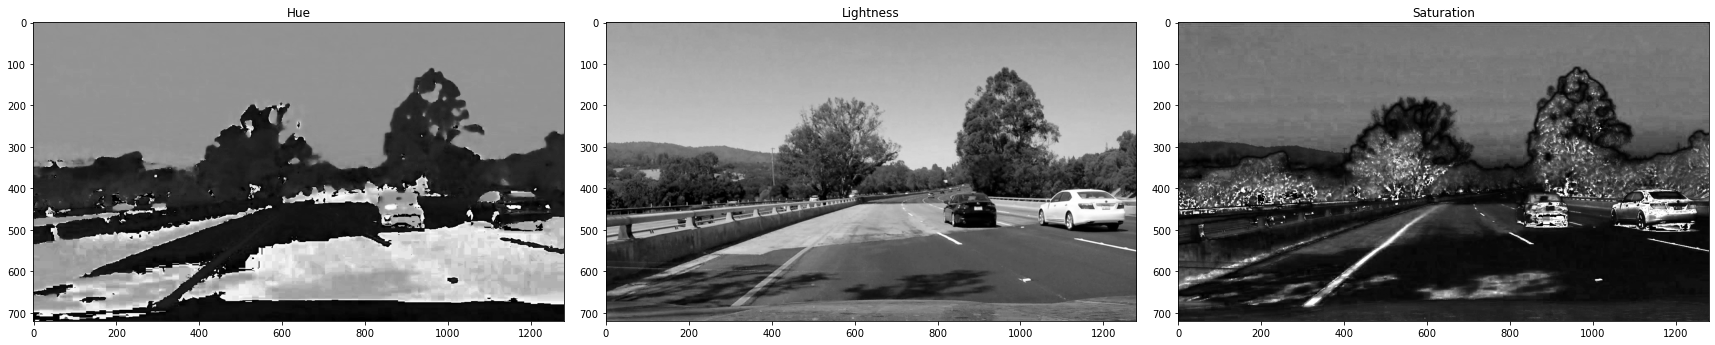

In [51]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24,9))
f.tight_layout()
ax1.imshow(H,cmap='gray')
ax1.set_title('Hue')
ax2.imshow(L,cmap='gray')
ax2.set_title('Lightness')
ax3.imshow(S,cmap='gray')
ax3.set_title('Saturation')

The S channel picks up the lines well, so let's try applying a threshold there:

In [52]:
S[:,700:800].mean()

71.86894444444444

Text(0.5, 1.0, 'S Binary')

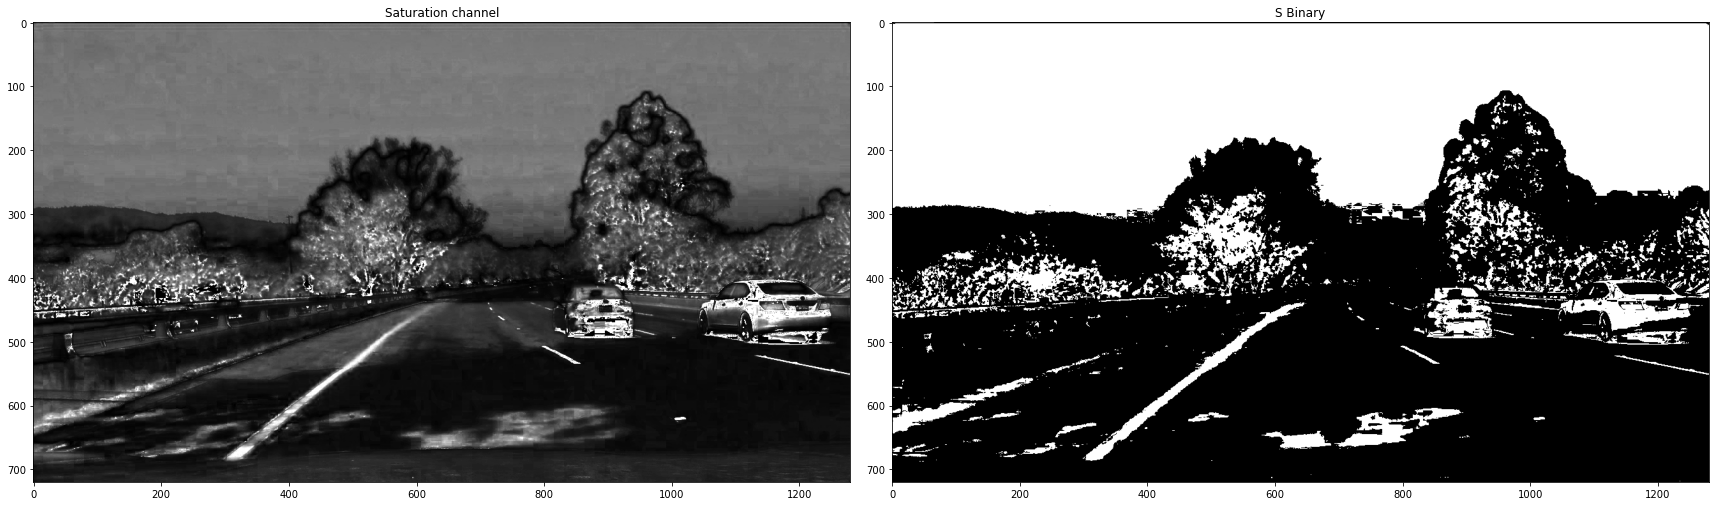

In [53]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1
f, (ax1,ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(S,cmap='gray')
ax1.set_title('Saturation channel')
ax2.imshow(binary,cmap='gray')
ax2.set_title('S Binary')

You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:

Text(0.5, 1.0, 'H Binary')

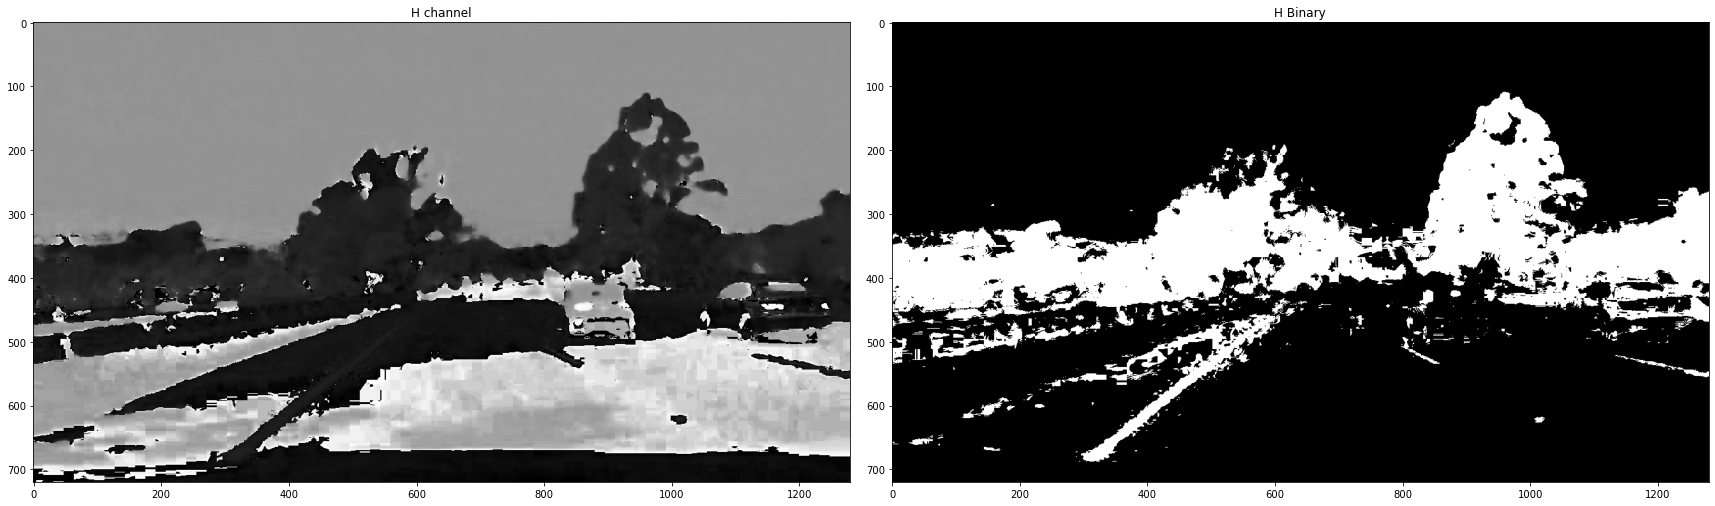

In [54]:
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

f, (ax1,ax2) = plt.subplots(1,2, figsize=(24,9))
f.tight_layout()
ax1.imshow(H,cmap='gray')
ax1.set_title('H channel')
ax2.imshow(binary,cmap='gray')
ax2.set_title('H Binary')

now apply the same above with different image frame 

Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

### Quiz

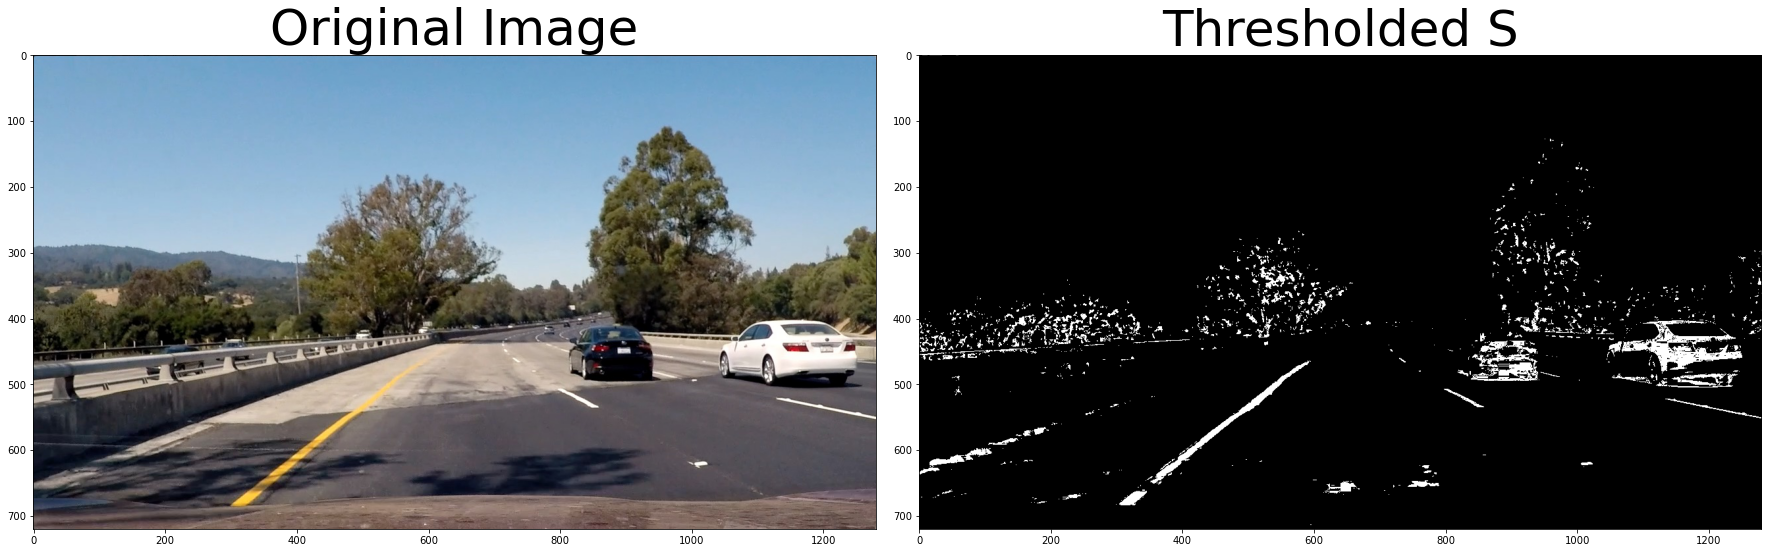

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test4.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    # 2) Apply a threshold to the S channel
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return binary_output
    
hls_binary = hls_select(image, thresh=(150, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Color and Gradient
Now it's time to combine what you know about color and gradient thresholding to get the best of both worlds. Here's an example of how that might look:

Text(0.5, 1.0, 'Output of color threshold')

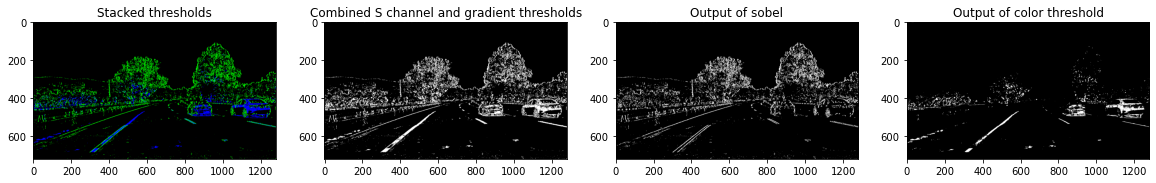

In [77]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
img = mpimg.imread('test4.jpg')
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

ax3.imshow(sxbinary, cmap='gray')
ax3.set_title('Output of sobel')

ax4.imshow(s_binary,cmap='gray')
ax4.set_title('Output of color threshold')

In this next exercise, you'll get the chance to play around with different combinations of color and gradient with the goal using the pipeline you come up with for your upcoming project. There's no correct submission, just explore!

Some interesting things to explore might include: the H channel, different threshold values for color and gradient binary images, and even a different color space, like HSV!

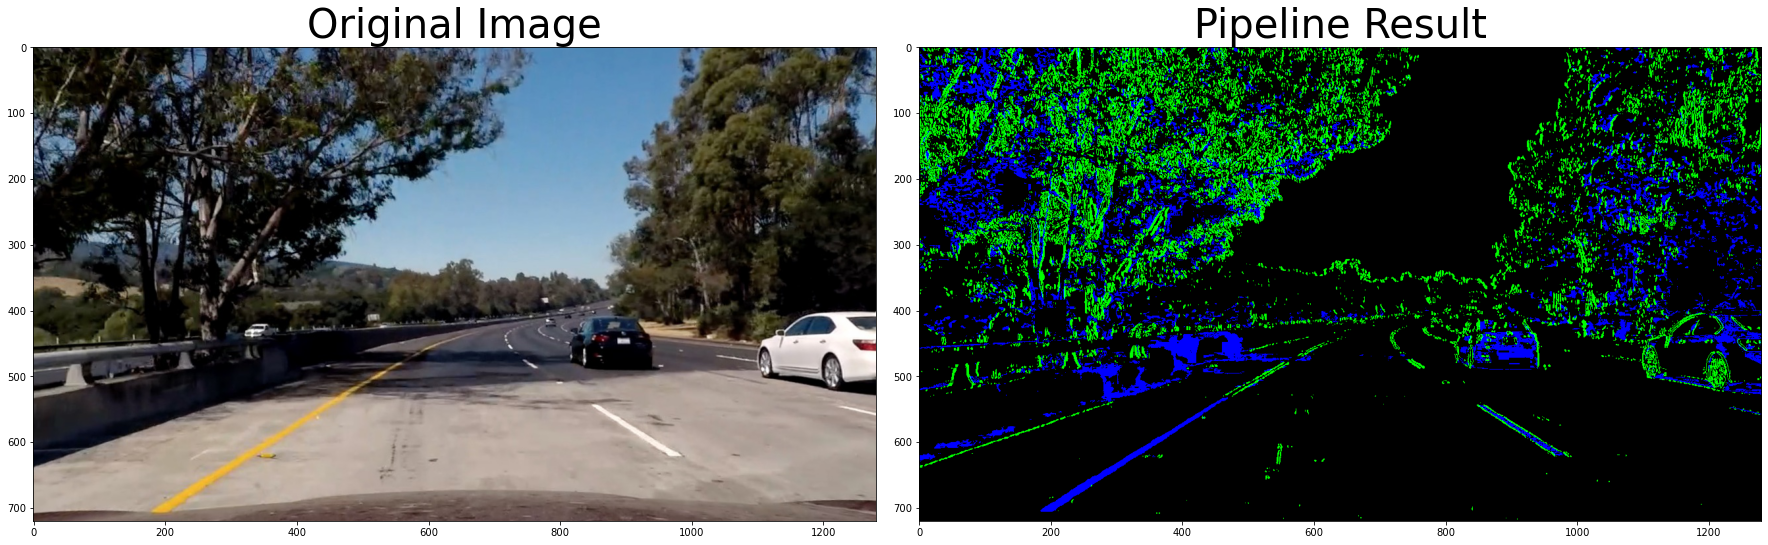

In [79]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('bridge_shadow.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)